In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
#载入数据
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

#查看前几行数据
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
#查看数据的摘要信息
titanic_df.info()
titanic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
#填充年龄为空的数据
titanic_df['Age'].fillna(value=titanic_df['Age'].mean(), inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [115]:
# 获取存活者与非存活者数据
survived_df = titanic_df[titanic_df['Survived'] == 1]
unsurvived_df = titanic_df[titanic_df['Survived'] == 0]

#提取存活与死亡的人数
def create_df(label):
    survived_count = survived_df[label].value_counts()
    unsurvived_count = unsurvived_df[label].value_counts()  
    return pd.DataFrame({'Survived':survived_count, 'Unsurvived':unsurvived_count})

#绘制柱状图
def draw_bar(data, label):
    data.plot(kind='bar', stacked=True, title='Survived '+ label)
    plt.xlabel(label)
    plt.ylabel('Number of People')
    plt.show()

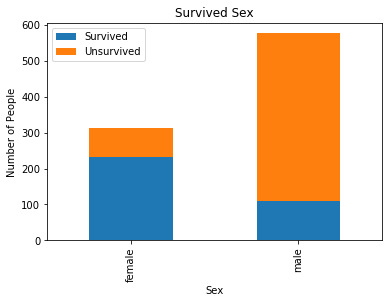

In [116]:
#不同性别乘客的存活与死亡人数
draw_bar(create_df('Sex'), 'Sex')

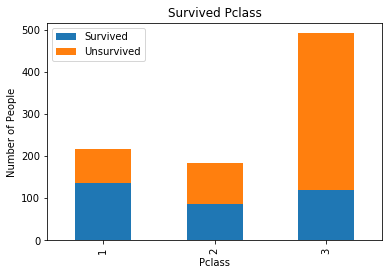

In [117]:
#不同等级乘客的存活率
draw_bar(create_df('Pclass'), 'Pclass')

In [118]:
#全部乘客中年龄的统计信息
titanic_df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [119]:
#存活乘客中年龄的统计信息
survived_df['Age'].describe()

count    342.000000
mean      28.549778
std       13.772498
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

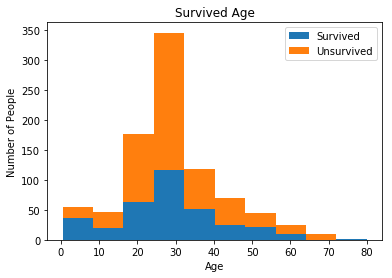

In [120]:
#全部乘客中年龄分布--直方图
survived_age = survived_df['Age']
unsurvived_age = unsurvived_df['Age']
df = pd.DataFrame({'Survived':survived_age, 'Unsurvived':unsurvived_age})
df.plot(kind='hist', stacked=True, title='Survived Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

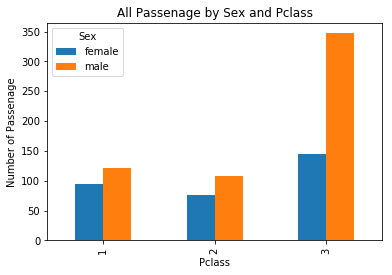

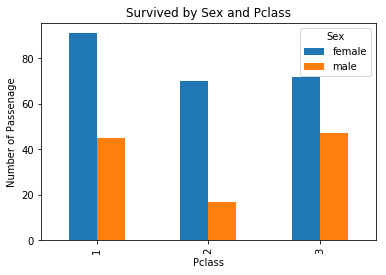

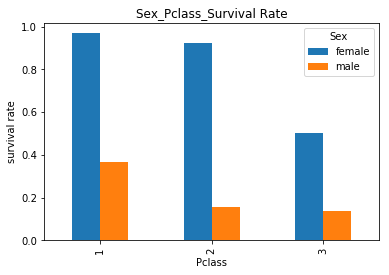

In [122]:
#不同性别和乘客等级的存活人数
titanic_df.groupby(['Pclass', 'Sex'])['Survived'].count().unstack().plot(kind='bar', title='All Passenage by Sex and Pclass')
plt.ylabel('Number of Passenage')

survived_df.groupby(['Pclass', 'Sex'])['Survived'].count().unstack().plot(kind='bar', title='Survived by Sex and Pclass')
plt.ylabel('Number of Passenage')

titanic_df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar', title='Sex_Pclass_Survival Rate')
plt.ylabel('survival rate')

plt.show()